<a href="https://colab.research.google.com/github/nanochiplab/Makine_Ogrenmesi/blob/main/Makine_%C3%96%C4%9Frenmesi_Final_FlowChartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Gerekli kütüphaneleri içe aktarıyoruz
import pandas as pd # veri yükleme, işleme, temizleme ve analiz gibi görevler için
import numpy as np #  matematiksel işlemler ve çok boyutlu dizileri kolayca yönetmek için
from sklearn.preprocessing import MinMaxScaler # sayısal özellikleri belirli bir aralığa (genellikle [0, 1]) ölçeklendirmek için

In [ ]:
# kendi dosya adımızı kullanarak 100.000 verilik bir veriseti oluşturacağız..
# BU HÜCRE SAMPLE DOSYASI YAPMAK İÇİN 1 DEFAYA MAHSUS KULLANILACAK
from google.colab import drive #Google drive'ı Colab Not defterine bağlamak için
drive.mount('/content/drive')  #import edeceğiz

#Veri Yolu ve dönüşümler
#Google Drive'ımızdaki bir dosyanın yolunu file_path adlı bir değişkene atar
file_path = "/content/drive/MyDrive/Makine Öğrenmesi/Final/HIGGS.csv"  # Her sınıf ayrı klasörde
#df = pd.read_csv('HIGGS.csv')
cf = pd.read_csv(file_path)      #Dosyayı okuyoruz...

# DataFrame'in ilk birkaç satırını görüntülüyoruz
print(cf.head())


# Veri setinden rastgele 100.000 örnek seçeceğiz
# replace=False, aynı satırın birden fazla kez seçilmesini engeller.
if len(cf) > 100000:  #Dosya içeriği 100.000 veriden büyükse
    df_sample = cf.sample(n=100000, random_state=42, replace=False) #Random 100.000 farklı veri seç
else:
    df_sample = cf.copy() #cf adlı DataFrame'in bir kopyasını oluşturur ve bu kopyayı df_sample adlı yeni bir değişkene atar
    print("Veri setinin boyutu 100.000'den küçük. Tamamı kullanılacaktır.") #Veri 100.000'den küçükse hepsini kullanacağız
#Ama verisetinin 100.000 örnekten fazla olduğunu biliyoruz..
# Artık işlemlerinizi df_sampled DataFrame'i üzerinde yapacağız
# Örneğin, df_sampled'in ilk 5 satırını görüntüleyelim:
print(df_sample.head())

In [ ]:
# Google Drive'a kaydetmek için dosya yolu
# SADECE SAMPLE DOSYASI OLUŞTURMAK İÇİN 1 DEFA KULLANILACAK
# 100.00 örneklik veriseti dosyası oluturacağız...
drive_file_path = '/content/drive/MyDrive/Makine Öğrenmesi/Final/HIGGS_sampled.csv' # İstediğiMiz Drive yolu

# Örneklenmiş DataFrame'i Google Drive'a CSV olarak kaydedeceğiz
df_sample.to_csv(drive_file_path, index=False) #Yukarıdaki dosya yoluna kayıt yapacağız

print(f"Örneklenmiş veri seti '{drive_file_path}' olarak Google Drive'a kaydedildi.") # Örnekleme Mesajı

In [3]:
#IQR ve MinMaxScaler işlemleri için sadece sayısal sütunlara ihtiyacımız var.
from google.colab import drive
drive.mount('/content/drive')

drive_file_path = '/content/drive/MyDrive/Makine Öğrenmesi/Final/HIGGS_sampled.csv' # İstediğiniz Drive yolunu belirtin
df = pd.read_csv(drive_file_path) #Sample Dosyayı df değişkenine atıyoruz..
# df DataFrame'indeki tüm sayısal sütunların adlarını belirler ve bu adları bir Python listesi olarak
# numerical_cols değişkenine atar
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   1.000000000000000000e+00  8.692932128906250000e-01  \
0                       1.0                  0.532373   
1                       0.0                  0.341129   
2                       1.0                  1.768051   
3                       0.0                  0.716481   
4                       0.0                  0.327586   

   -6.350818276405334473e-01  2.256902605295181274e-01  \
0                  -0.563982                 -0.707137   
1                   0.069098                  0.325565   
2                  -0.226015                 -1.334685   
3                  -0.800656                 -1.245352   
4                   1.395643                  1.130114   

   3.274700641632080078e-01  -6.899932026863098145e-01  \
0                  0.682998                   0.702177   
1                  2.925696                   0.500175   
2    

In [ ]:
# İşlem türünü seçimlik yaptık: 'silme' veya 'sınır'
islem_turu = 'sınır' # Aykırı değerler ile değiştireceğimiz işlem türü sınır yaptık veya 'silme' de olur

for col in numerical_cols: #numerical_cols değişkenindeki sayısal sütunların listesi üzerinde döngü.
    Q1 = df[col].quantile(0.25) #Seçilen sütunun (%25) ilk çeyrek değerini alır
    Q3 = df[col].quantile(0.75) #Seçilen sütunun (%75) üçüncü çeyrek değerini alır
    IQR = Q3 - Q1 #Çeyrekler arası aralığı (IQR) hesaplar.
    #IQR, üçüncü çeyrek ile ilk çeyrek arasındaki farktır

    alt_sinir = Q1 - 1.5 * IQR #Aykırı değerleri belirlemek için alt sınırı hesaplar.
    #Bu, ilk çeyrekten IQR'nin 1.5 katı çıkarılarak bulunur
    ust_sinir = Q3 + 1.5 * IQR #Aykırı değerleri belirlemek için üst sınırı hesaplar.
    #Bu, üçüncü çeyreğe IQR'nin 1.5 katı eklenerek bulunur

    if islem_turu == 'silme': #KOD İŞLEME BURAYA GİRMEYECEK !!!!! çünkü yukarıda SINIR olarak belirledik
        # Aykırı değerleri silme
        # col adlı sütundaki değerleri alt_sinir ve ust_sinir arasında olan satırları seçen bir boolean
        # maskesi oluşturur. Sadece bu koşulu sağlayan satırlar DataFrame'de kalır
        df = df[(df[col] >= alt_sinir) & (df[col] <= ust_sinir)].copy()
    elif islem_turu == 'sınır':
        # Aykırı değerleri sınır değerlerle değiştirme
        #col sütunundaki bir değerin alt_sinirdan küçük olup olmadığını kontrol eder.Eğer koşul doğruysa
        #o değer yerine alt_sinir konur. Eğer koşul yanlışsa değer olduğu gibi kalır.
        df[col] = np.where(df[col] < alt_sinir, alt_sinir, df[col])
        #col sütunundaki bir değerin ust_sinirdan büyük olup olmadığını kontrol eder.Eğer koşul doğruysa
        #o değer yerine ust_sinir konur. Eğer koşul yanlışsa değer olduğu gibi kalır.
        df[col] = np.where(df[col] > ust_sinir, ust_sinir, df[col])

In [ ]:
#Aykırı değer işlemlerinden sonra, sayısal değişkenleri MinMaxScaler kullanarak [0, 1] aralığına dönüştürebiliriz.
scaler = MinMaxScaler() #scikit-learn kütüphanesinden MinMaxScaler sınıfının bir örneğini oluşturur.

#Önceki adımda oluşturulan MinMaxScaler objesini kullanarak df DataFrame'indeki sayısal sütunları [0, 1]
#aralığına ölçeklendirir ve sonuçları aynı sütunlara geri atar
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Veri setimizin ilk sütununu (indeksi 0) hedef değişken olarak belirleyeceğiz.
hedef_degiskeni = df.columns[0]
y = df[hedef_degiskeni] # hedef değişken olarak "y" atadık

# Hedef değişken sütununu veri setinden çıkararak özellik matrisini (X) oluşturuyoruz
X = df.drop(columns=[hedef_degiskeni])

print(f"Hedef değişken olarak '{hedef_degiskeni}' sütunu seçildi.") #yaptıklarımızı yazdırıyoruz..
print("X (özellikler) DataFrame'inin ilk birkaç satırı:") #yaptıklarımızı yazdırıyoruz..
print(X.head()) # Dataframe'in ilk baş kısmını yazdıracağız
print("\ny (hedef değişken) Seriesop'inin ilk birkaç değeri:") #yaptıklarımızı yazdırıyoruz..
print(y.head()) # Hedef değişkenimize ait ilk baş kısmını yazdıracağız..

Hedef değişken olarak '1.000000000000000000e+00' sütunu seçildi.
X (özellikler) DataFrame'inin ilk birkaç satırı:
   8.692932128906250000e-01  -6.350818276405334473e-01  \
0                  0.133056                     0.3842   
1                  0.034304                     0.5142   
2                  0.771121                     0.4536   
3                  0.228123                     0.3356   
4                  0.027311                     0.7866   

   2.256902605295181274e-01  3.274700641632080078e-01  \
0                  0.297030                  0.287704   
1                  0.593295                  1.000000   
2                  0.116997                  0.583006   
3                  0.142625                  0.272939   
4                  0.824106                  0.502641   

   -6.899932026863098145e-01  7.542022466659545898e-01  \
0                   0.701456                  1.000000   
1                   0.643529                  1.000000   
2                   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 12.0 MB/s eta 0:00:00

Processing Model: KNN in Outer Fold 1
    Inner Fold 1 AUC: 0.7088
    Inner Fold 2 AUC: 0.6978
    Inner Fold 3 AUC: 0.7140
  Mean Inner CV AUC for KNN in Outer Fold 1: 0.7068

  Outer Fold 1 Test Scores (KNN):
    AUC: 0.7072
    Accuracy: 0.6563
    Precision: 0.6592
    Recall: 0.7219
    F1 Score: 0.6891


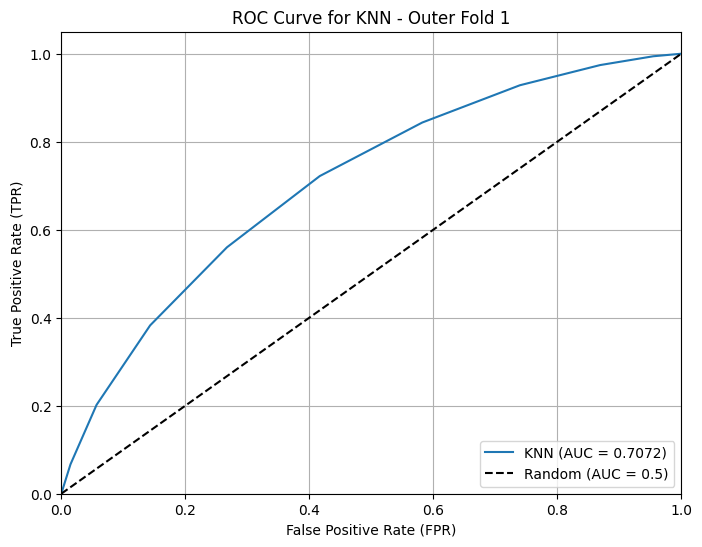


Processing Model: SVM in Outer Fold 1
    Inner Fold 1 AUC: 0.7607
    Inner Fold 2 AUC: 0.7577
    Inner Fold 3 AUC: 0.7460
  Mean Inner CV AUC for SVM in Outer Fold 1: 0.7548

  Outer Fold 1 Test Scores (SVM):
    AUC: 0.7623
    Accuracy: 0.6928
    Precision: 0.6863
    Recall: 0.7694
    F1 Score: 0.7255


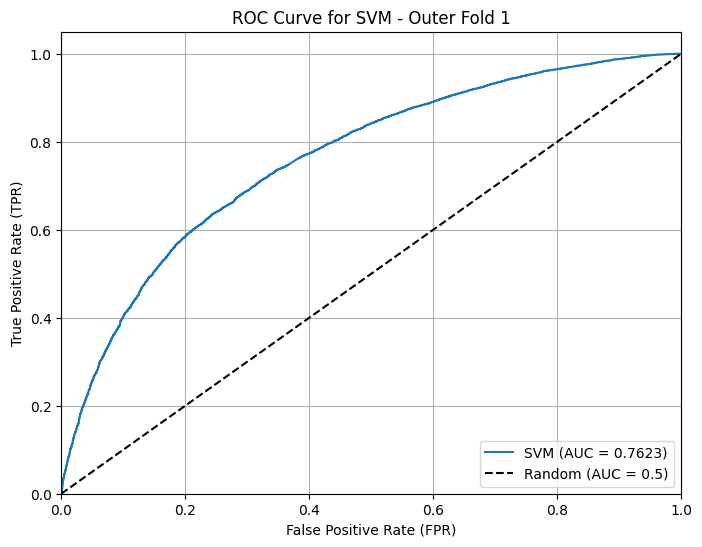


Processing Model: MLP in Outer Fold 1
    Inner Fold 1 AUC: 0.7964
    Inner Fold 2 AUC: 0.7867
    Inner Fold 3 AUC: 0.7802
  Mean Inner CV AUC for MLP in Outer Fold 1: 0.7878

  Outer Fold 1 Test Scores (MLP):
    AUC: 0.7903
    Accuracy: 0.7022
    Precision: 0.6746
    Recall: 0.8411
    F1 Score: 0.7487


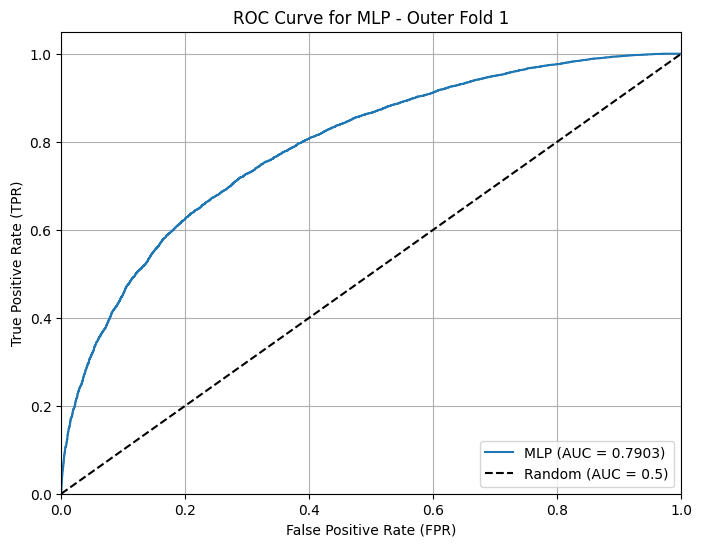


Processing Model: XGBoost in Outer Fold 1
    Inner Fold 1 AUC: 0.8045
    Inner Fold 2 AUC: 0.7925
    Inner Fold 3 AUC: 0.7912
  Mean Inner CV AUC for XGBoost in Outer Fold 1: 0.7961

  Outer Fold 1 Test Scores (XGBoost):
    AUC: 0.7922
    Accuracy: 0.7163
    Precision: 0.7292
    Recall: 0.7353
    F1 Score: 0.7322


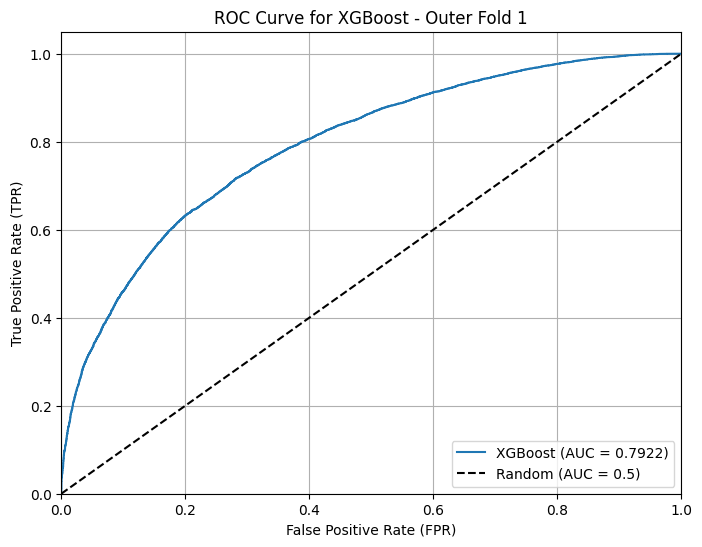


Processing Model: KNN in Outer Fold 2
    Inner Fold 1 AUC: 0.6836
    Inner Fold 2 AUC: 0.6890
    Inner Fold 3 AUC: 0.7019
  Mean Inner CV AUC for KNN in Outer Fold 2: 0.6915

  Outer Fold 2 Test Scores (KNN):
    AUC: 0.6967
    Accuracy: 0.6460
    Precision: 0.6481
    Recall: 0.7200
    F1 Score: 0.6821


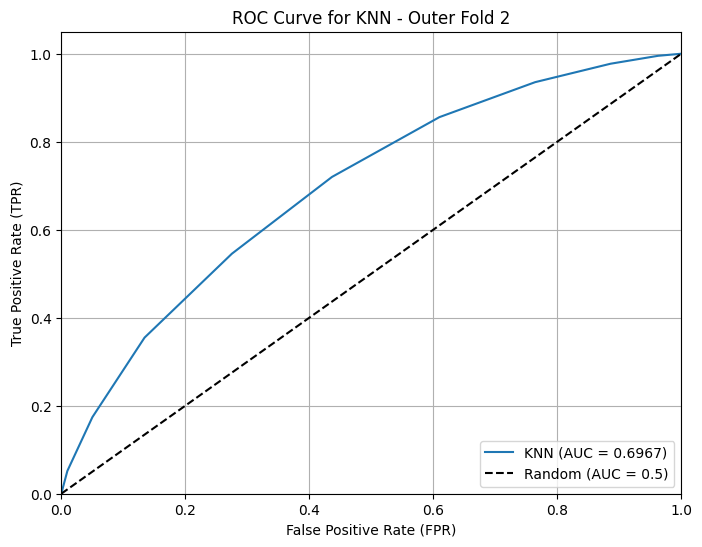


Processing Model: SVM in Outer Fold 2
    Inner Fold 1 AUC: 0.7626
    Inner Fold 2 AUC: 0.7621
    Inner Fold 3 AUC: 0.7733
  Mean Inner CV AUC for SVM in Outer Fold 2: 0.7660

  Outer Fold 2 Test Scores (SVM):
    AUC: 0.7621
    Accuracy: 0.6935
    Precision: 0.6861
    Recall: 0.7722
    F1 Score: 0.7266


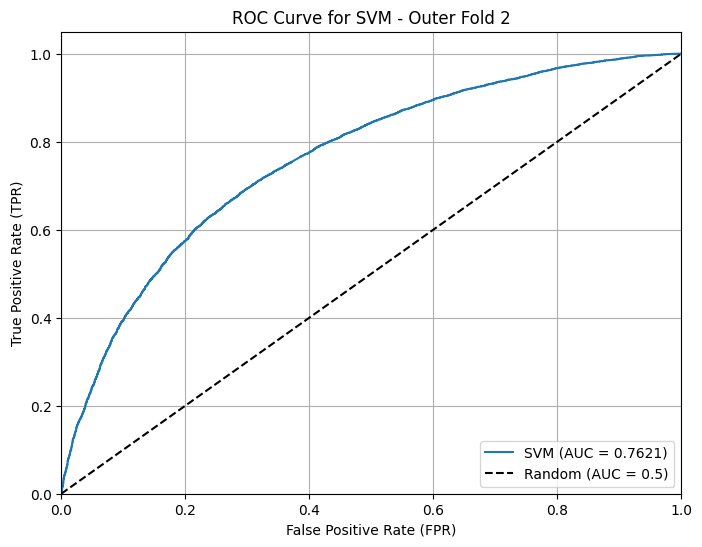


Processing Model: MLP in Outer Fold 2
    Inner Fold 1 AUC: 0.7857
    Inner Fold 2 AUC: 0.7928
    Inner Fold 3 AUC: 0.7921
  Mean Inner CV AUC for MLP in Outer Fold 2: 0.7902

  Outer Fold 2 Test Scores (MLP):
    AUC: 0.7919
    Accuracy: 0.7101
    Precision: 0.6940
    Recall: 0.8059
    F1 Score: 0.7458


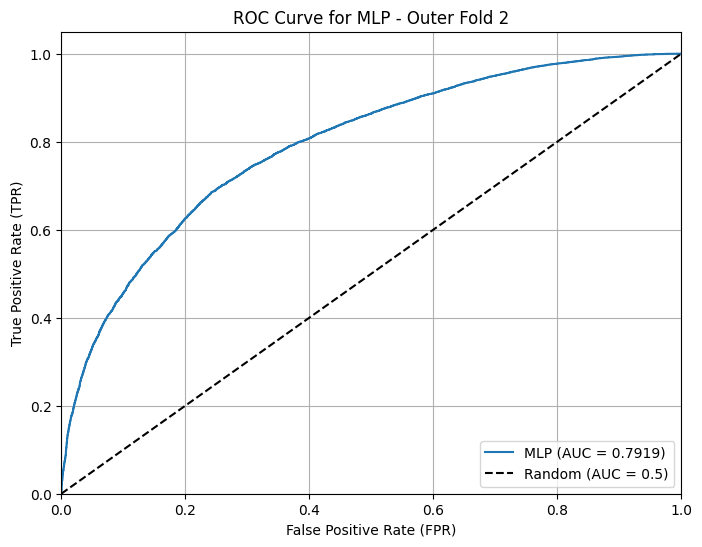


Processing Model: XGBoost in Outer Fold 2
    Inner Fold 1 AUC: 0.7941
    Inner Fold 2 AUC: 0.7920
    Inner Fold 3 AUC: 0.7925
  Mean Inner CV AUC for XGBoost in Outer Fold 2: 0.7929

  Outer Fold 2 Test Scores (XGBoost):
    AUC: 0.7947
    Accuracy: 0.7156
    Precision: 0.7295
    Recall: 0.7325
    F1 Score: 0.7310


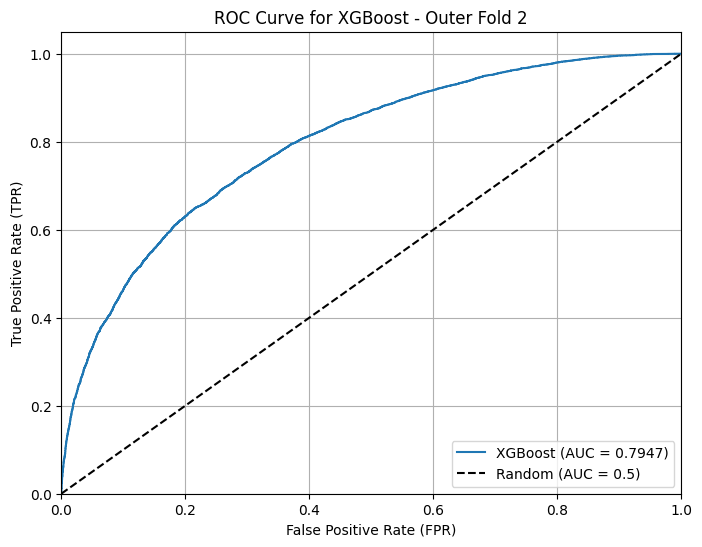


Processing Model: KNN in Outer Fold 3
    Inner Fold 1 AUC: 0.6902
    Inner Fold 2 AUC: 0.6944
    Inner Fold 3 AUC: 0.6869
  Mean Inner CV AUC for KNN in Outer Fold 3: 0.6905

  Outer Fold 3 Test Scores (KNN):
    AUC: 0.7196
    Accuracy: 0.6644
    Precision: 0.6639
    Recall: 0.7368
    F1 Score: 0.6985


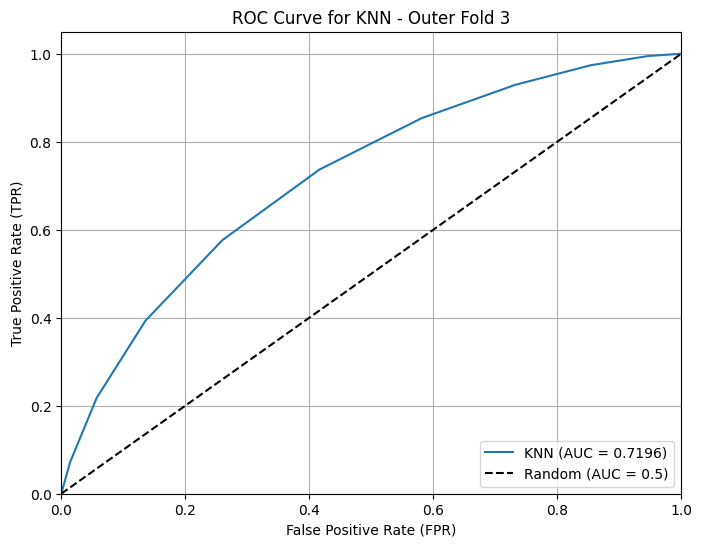


Processing Model: SVM in Outer Fold 3
    Inner Fold 1 AUC: 0.7729
    Inner Fold 2 AUC: 0.7674
    Inner Fold 3 AUC: 0.7571
  Mean Inner CV AUC for SVM in Outer Fold 3: 0.7658

  Outer Fold 3 Test Scores (SVM):
    AUC: 0.7742
    Accuracy: 0.7079
    Precision: 0.7018
    Recall: 0.7763
    F1 Score: 0.7372


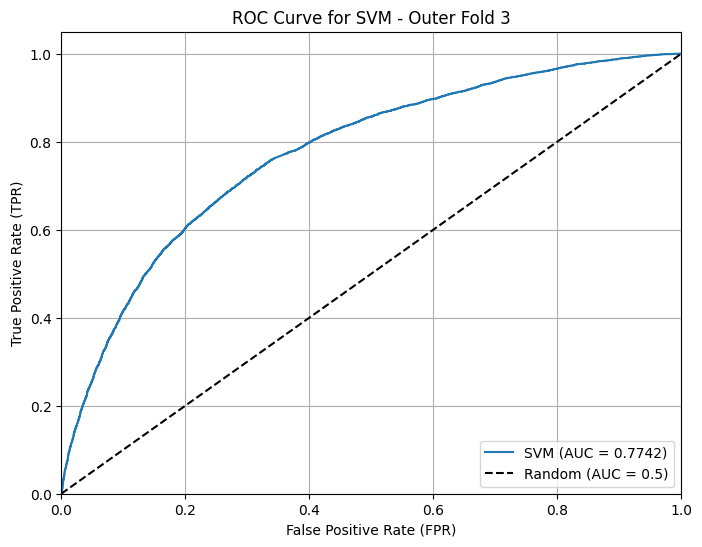


Processing Model: MLP in Outer Fold 3
    Inner Fold 1 AUC: 0.7815
    Inner Fold 2 AUC: 0.7871
    Inner Fold 3 AUC: 0.7797
  Mean Inner CV AUC for MLP in Outer Fold 3: 0.7827

  Outer Fold 3 Test Scores (MLP):
    AUC: 0.7988
    Accuracy: 0.7218
    Precision: 0.7204
    Recall: 0.7722
    F1 Score: 0.7454


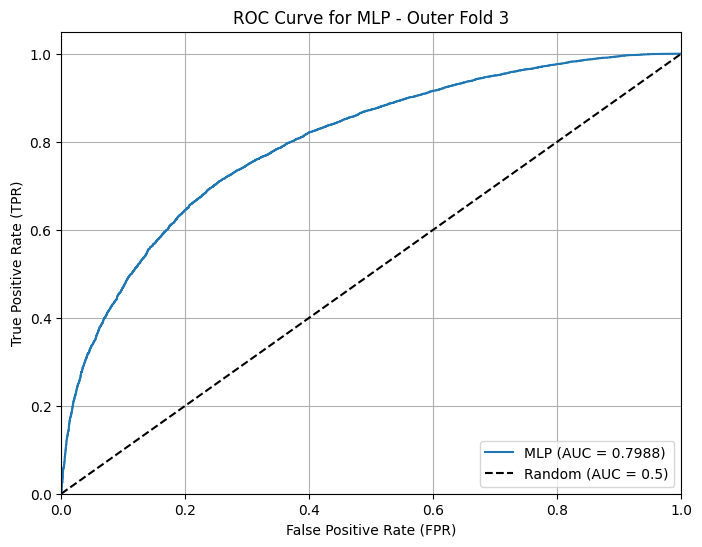


Processing Model: XGBoost in Outer Fold 3
    Inner Fold 1 AUC: 0.7934
    Inner Fold 2 AUC: 0.7989
    Inner Fold 3 AUC: 0.7892
  Mean Inner CV AUC for XGBoost in Outer Fold 3: 0.7938

  Outer Fold 3 Test Scores (XGBoost):
    AUC: 0.8054
    Accuracy: 0.7264
    Precision: 0.7364
    Recall: 0.7497
    F1 Score: 0.7430


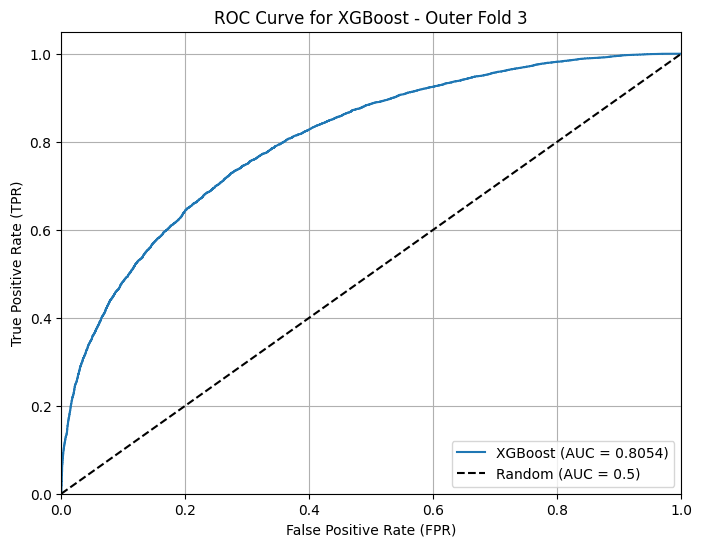


Processing Model: KNN in Outer Fold 4
    Inner Fold 1 AUC: 0.6965
    Inner Fold 2 AUC: 0.6776
    Inner Fold 3 AUC: 0.7005
  Mean Inner CV AUC for KNN in Outer Fold 4: 0.6915

  Outer Fold 4 Test Scores (KNN):
    AUC: 0.6978
    Accuracy: 0.6494
    Precision: 0.6514
    Recall: 0.7219
    F1 Score: 0.6848


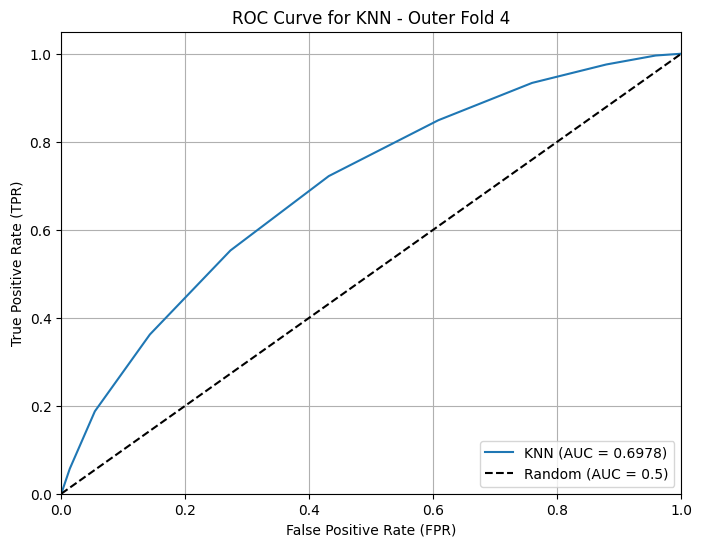


Processing Model: SVM in Outer Fold 4
    Inner Fold 1 AUC: 0.7630
    Inner Fold 2 AUC: 0.7482
    Inner Fold 3 AUC: 0.7626
  Mean Inner CV AUC for SVM in Outer Fold 4: 0.7579

  Outer Fold 4 Test Scores (SVM):
    AUC: 0.7592
    Accuracy: 0.6942
    Precision: 0.6878
    Recall: 0.7697
    F1 Score: 0.7265


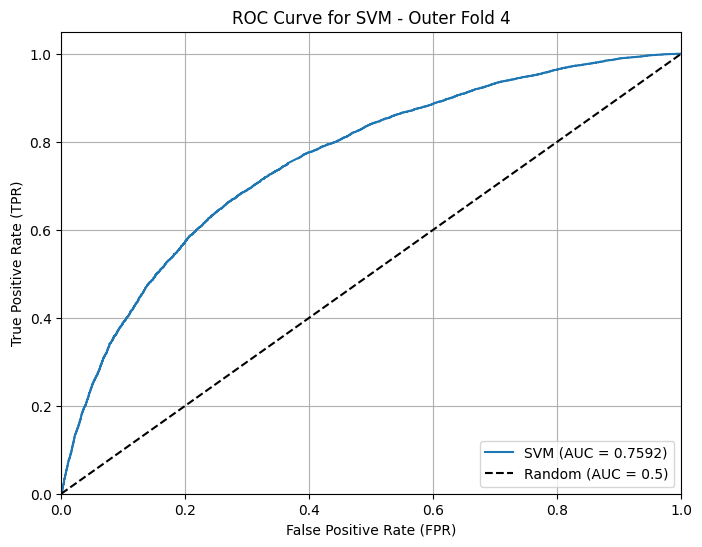


Processing Model: MLP in Outer Fold 4
    Inner Fold 1 AUC: 0.7881
    Inner Fold 2 AUC: 0.7897
    Inner Fold 3 AUC: 0.7825
  Mean Inner CV AUC for MLP in Outer Fold 4: 0.7868

  Outer Fold 4 Test Scores (MLP):
    AUC: 0.7917
    Accuracy: 0.7124
    Precision: 0.6982
    Recall: 0.8011
    F1 Score: 0.7461


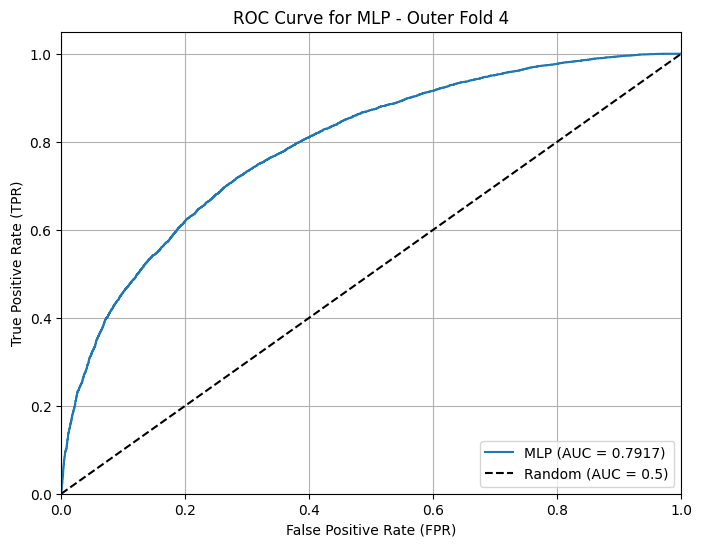


Processing Model: XGBoost in Outer Fold 4
    Inner Fold 1 AUC: 0.7979
    Inner Fold 2 AUC: 0.7833
    Inner Fold 3 AUC: 0.7934
  Mean Inner CV AUC for XGBoost in Outer Fold 4: 0.7915

  Outer Fold 4 Test Scores (XGBoost):
    AUC: 0.7945
    Accuracy: 0.7200
    Precision: 0.7329
    Recall: 0.7384
    F1 Score: 0.7357


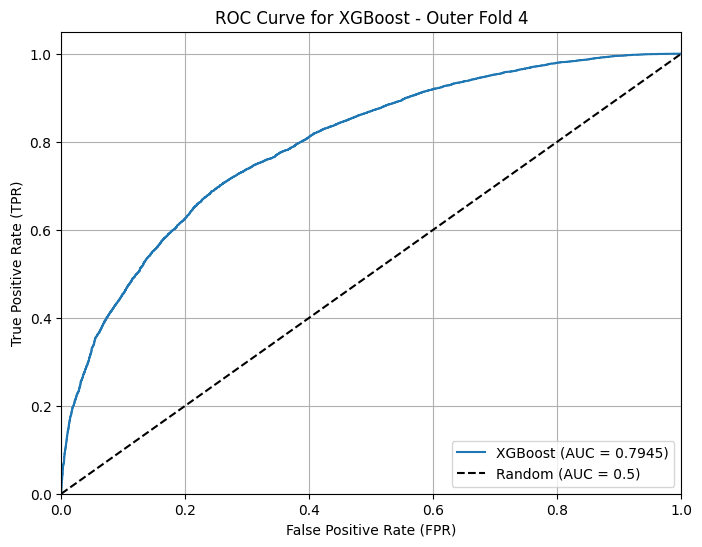


Processing Model: KNN in Outer Fold 5
    Inner Fold 1 AUC: 0.6987
    Inner Fold 2 AUC: 0.6993
    Inner Fold 3 AUC: 0.6948
  Mean Inner CV AUC for KNN in Outer Fold 5: 0.6976

  Outer Fold 5 Test Scores (KNN):
    AUC: 0.7002
    Accuracy: 0.6481
    Precision: 0.6479
    Recall: 0.7291
    F1 Score: 0.6861


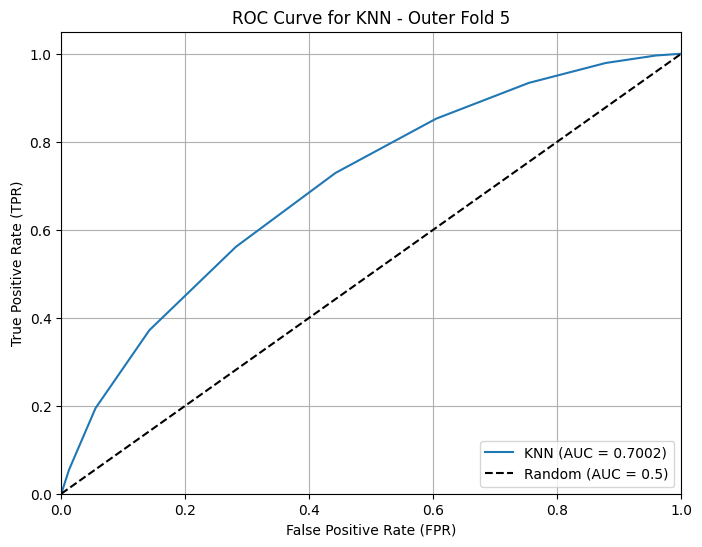


Processing Model: SVM in Outer Fold 5
    Inner Fold 1 AUC: 0.7680
    Inner Fold 2 AUC: 0.7664
    Inner Fold 3 AUC: 0.7630
  Mean Inner CV AUC for SVM in Outer Fold 5: 0.7658

  Outer Fold 5 Test Scores (SVM):
    AUC: 0.7609
    Accuracy: 0.6929
    Precision: 0.6845
    Recall: 0.7753
    F1 Score: 0.7270


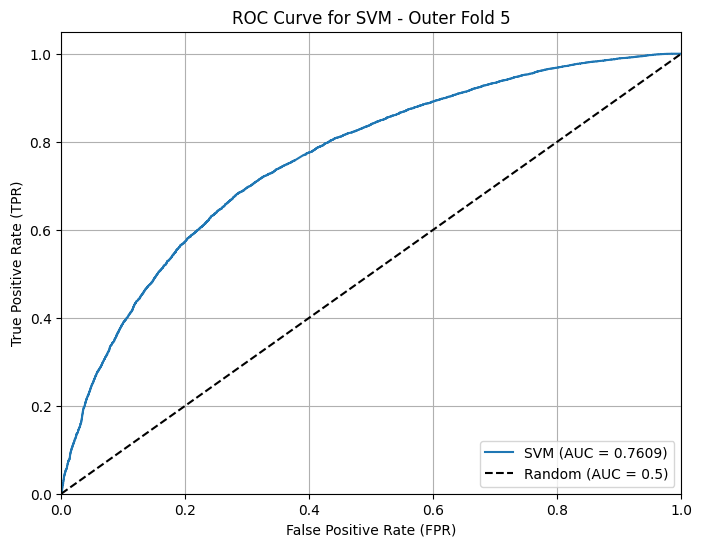


Processing Model: MLP in Outer Fold 5
    Inner Fold 1 AUC: 0.7784
    Inner Fold 2 AUC: 0.7854
    Inner Fold 3 AUC: 0.7800
  Mean Inner CV AUC for MLP in Outer Fold 5: 0.7813

  Outer Fold 5 Test Scores (MLP):
    AUC: 0.7944
    Accuracy: 0.7154
    Precision: 0.7209
    Recall: 0.7515
    F1 Score: 0.7359


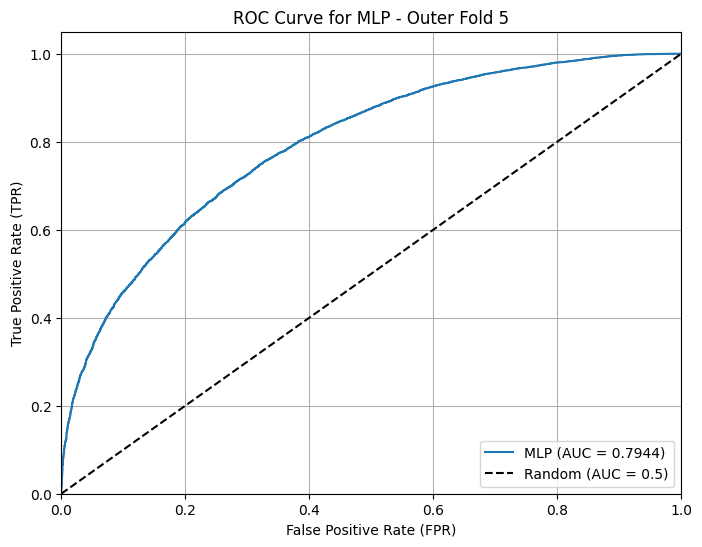


Processing Model: XGBoost in Outer Fold 5
    Inner Fold 1 AUC: 0.7957
    Inner Fold 2 AUC: 0.7950
    Inner Fold 3 AUC: 0.7901
  Mean Inner CV AUC for XGBoost in Outer Fold 5: 0.7936

  Outer Fold 5 Test Scores (XGBoost):
    AUC: 0.7924
    Accuracy: 0.7135
    Precision: 0.7258
    Recall: 0.7341
    F1 Score: 0.7300


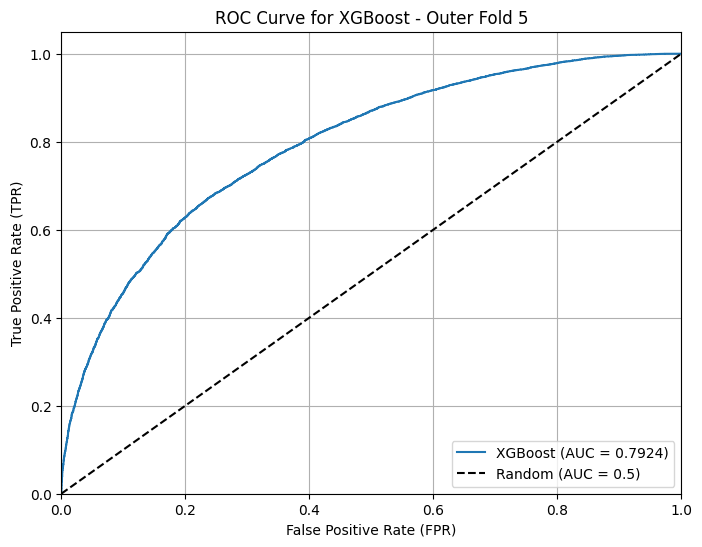


Nested Cross-Validation Results (Mean +/- Std Dev)

--- KNN ---
AUC: 0.7043 +/- 0.0085
Accuracy: 0.6529 +/- 0.0067
Precision: 0.6541 +/- 0.0064
Recall: 0.7260 +/- 0.0063
F1 Score: 0.6881 +/- 0.0056

--- SVM ---
AUC: 0.7638 +/- 0.0053
Accuracy: 0.6963 +/- 0.0059
Precision: 0.6893 +/- 0.0063
Recall: 0.7726 +/- 0.0028
F1 Score: 0.7286 +/- 0.0043

--- MLP ---
AUC: 0.7934 +/- 0.0030
Accuracy: 0.7124 +/- 0.0064
Precision: 0.7016 +/- 0.0174
Recall: 0.7944 +/- 0.0306
F1 Score: 0.7444 +/- 0.0044

--- XGBoost ---
AUC: 0.7958 +/- 0.0049
Accuracy: 0.7183 +/- 0.0045
Precision: 0.7308 +/- 0.0036
Recall: 0.7380 +/- 0.0062
F1 Score: 0.7344 +/- 0.0047

Aggregated ROC Curves and AUC Scores


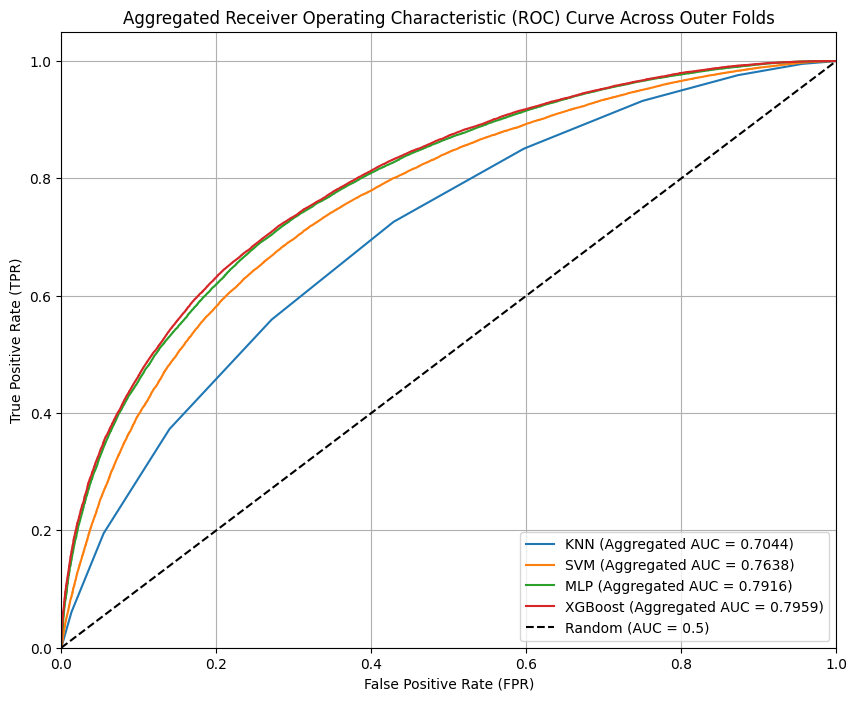


Aggregated ROC Eğrileri ve AUC Skorları görselleştirildi.

Aggregated AUC Skorlarının Yorumlanması:
- KNN: Birleştirilmiş AUC skoru 0.7044
  -> İyi sınıflandırıcı.
- SVM: Birleştirilmiş AUC skoru 0.7638
  -> İyi sınıflandırıcı.
- MLP: Birleştirilmiş AUC skoru 0.7916
  -> İyi sınıflandırıcı.
- XGBoost: Birleştirilmiş AUC skoru 0.7959
  -> İyi sınıflandırıcı.


In [ ]:
!pip install xgboost             #xgboost kütüphanesini yüklüyoruz.
#not defteri ortamının özelliklerine erişmek veya not defteri ortamını özelleştirmek için kullanılır
from IPython import get_ipython  #IPython kütüphanesinden get_ipython fonksiyonunu içe aktarır.
from IPython.display import display #IPython.display modülünden display fonksiyonunu içe aktarır

from sklearn.metrics import roc_curve, auc #roc_curve: Bu fonksiyon, Gerçek Pozitif Oranı
# (True Positive Rate - TPR) ve Yanlış Pozitif Oranı (False Positive Rate - FPR) değerlerini farklı
# olasılık eşiklerinde hesaplamak için kullanılır.auc: Bu fonksiyon, verilen noktaları kullanarak
# eğri Altındaki Alanı (Area Under the Curve - AUC) hesaplar

import matplotlib.pyplot as plt #Python'da yaygın olarak kullanılan bir grafik çizim kütüphanesi olan
# Matplotlib'in pyplot modülünü içe aktarır

from sklearn.model_selection import StratifiedKFold, GridSearchCV # Çapraz doğrulama için, farklı model hiperparametrelerini denemek ve en iyi kombinasyonu bulmak için

# En ilgili ve bilgilendirici özellikleri seçmek için kullanabileceğimiz araçlar
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, mutual_info_regression

from sklearn.neighbors import KNeighborsClassifier # KNN sınıflandırma modeli oluşturmak için

from sklearn.svm import SVC # SVC sınıflandırma modeli oluşturmak için

from sklearn.neural_network import MLPClassifier # MLP sinir ağı sınıflandırma modeli oluşturmak için

from xgboost import XGBClassifier # XGBoost sınıflandırma modeli oluşturmak için

# Bu metrikleri kullanarak Nested Cross-Validation sürecinin her dış katmanında en iyi modelin test seti
# üzerindeki performansını değerlendirmek ve nihai sonuçları raporlamak için
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Veri işleme adımlarını (örneğin, özellik ölçeklendirme, özellik seçimi) ve bir modeli bir araya
# getirmek için Pipeline sınıfını yüklüyoruz
from sklearn.pipeline import Pipeline

import warnings # Uyarıları gizlemek için
warnings.filterwarnings("ignore")

# Nested Cross-Validation ayarları
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #iç içe geçmiş çapraz doğrulama
# işleminin dış döngüsünü kurmak için kullanacağız. Dış döngü, verileri 5 kez eğitim ve test setlerine
# böler ve her bölünme için model eğitilir ve değerlendirilir

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) #dış döngünün her bir iterasyonunda
# kullanılan eğitim verisini daha fazla bölmek için kullanılır. Bu iç döngü genellikle hiperparametre
# ayarı veya özellik seçimi gibi görevler için bir doğrulama seti sağlamak amacıyla kullanılır.

# Sabitlenmiş Hiperparametreler
fixed_model_params = {
    'KNN': {'n_neighbors': 9},          #n_neighbors hiperparametresinin değeri 9
    'SVM': {'C': 1, 'kernel': 'rbf'},   #C hiperparametresinin 1 ve kernel hiperparametresi 'rbf'
    'MLP': {'hidden_layer_sizes': (100,), 'activation': 'relu'}, #Gizli katman 100 nöron ve aktivasyon fonksiyonu relu
    'XGBoost': {'learning_rate': 0.1, 'n_estimators': 100} #Öğrenme oranı 0.1 ve ağaç sayısı(tahminci) 100
}

# Her model için dış test skorlarını saklamak için sözlük kuruyoruz...
outer_test_scores = {
    'KNN': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}, # KNN dış test skorları
    'SVM': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}, # SVM dış test skorları
    'MLP': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}, # MLP dış test skorları
    'XGBoost': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []} # XGBoost dış test skorları
}

# Her model için tüm dış test katmanlarının gerçek etiketlerini ve tahmin olasılıklarını saklamak için sözlükler
# Döngü tamamlandıktan sonra, bu all_outer_y_true sözlüğü, her model için tüm dış test katmanlarından
# birleştirilmiş gerçek etiketleri içerecektir. Bu birleştirilmiş etiketler, daha sonra tüm dış katmanlar
# üzerinden toplu bir ROC eğrisi çizmek gibi işlemler için kullanılacaktır. Toplu ROC eğrisi, modelin
# genel performansını daha sağlam bir şekilde değerlendirmeye yardımcı olur.
all_outer_y_true = {
    'KNN': [],
    'SVM': [],
    'MLP': [],
    'XGBoost': []
}

# Döngü tamamlandıktan sonra, bu all_outer_y_proba sözlüğü, her model için tüm dış test katmanlarından
# birleştirilmiş tahmin olasılıklarını içerecektir. Bu birleştirilmiş olasılıklar, all_outer_y_true
# sözlüğündeki birleştirilmiş gerçek etiketlerle birlikte kullanılarak, tüm dış katmanlar üzerinden toplu
# ROC eğrileri çizmek ve toplu AUC skorları hesaplamak için kullanılır.
all_outer_y_proba = {
    'KNN': [],
    'SVM': [],
    'MLP': [],
    'XGBoost': []
}

# Outer Loop
for fold_idx, (outer_train_index, outer_test_index) in enumerate(outer_cv.split(X, y)): # 5 kez çalışarak verisetini farklı bir eğitim ve test setine bölecek
    X_outer_train, X_outer_test = X.iloc[outer_train_index], X.iloc[outer_test_index] # Ana veriseti kullanılarak Dış döngü için eğitim ve test verisetlerini oluşturacağız
    y_outer_train, y_outer_test = y.iloc[outer_train_index], y.iloc[outer_test_index] # Ana hedef değişken veri setinden dış eğitim ve test veriseti oluşturacağız

    for model_name, fixed_params in fixed_model_params.items(): # Her model için sabitlenmiş hiperparametrelerle döngü başlatacağız
        print(f"\nProcessing Model: {model_name} in Outer Fold {fold_idx + 1}") # Bilgi mesajı

        # Model örneğini sabitlenmiş hiperparametrelerle oluşturuyoruz.
        # Bu model, iç döngüde her seferinde yeniden eğitilecek
        # ve dış test seti için en son kez eğitilecek
        if model_name == 'KNN':
            model = KNeighborsClassifier(**fixed_params) #sabit parametreler alınarak model oluşturuluyor
        elif model_name == 'SVM':
            model = SVC(probability=True, random_state=42, **fixed_params) #sabit parametreler alınarak model oluşturuluyor
        elif model_name == 'MLP':
            model = MLPClassifier(max_iter=2000, random_state=42, **fixed_params) #sabit parametreler alınarak model oluşturuluyor
        elif model_name == 'XGBoost':
            model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **fixed_params) #sabit parametreler alınarak model oluşturuluyor

        # === Bu noktada manuel iç çapraz doğrulama başlıyor ===
        # Bu iç döngüde özellik seçimi ve model eğitimi/değerlendirmesi yapılacak

        inner_cv_scores = [] # İç doğrulama skorlarını toplamak için

        # Inner Loop (İç Çapraz Doğrulama)
        # Her iç iterasyonda, dış eğitim verisini kullanarak yeni bir iç eğitim ve iç doğrulama setleri
        # oluşturacağız. Bu alt kümeler, genellikle modelin hiperparametrelerini ayarlamak veya özellik
        # seçimi yapmak için kullanılır
        for inner_fold_idx, (inner_train_index, inner_val_index) in enumerate(inner_cv.split(X_outer_train, y_outer_train)):
            X_inner_train, X_inner_val = X_outer_train.iloc[inner_train_index], X_outer_train.iloc[inner_val_index] #mevcut iç katman için
            # yeni bir iç eğitim (X_inner_train) ve iç doğrulama (X_inner_val) özellik seti oluşturur. Bu alt kümeler, iç döngü içinde
            # model eğitimi (genellikle hiperparametre ayarı bağlamında) ve doğrulama performansı değerlendirmesi için kullanılacaktır
            y_inner_train, y_inner_val = y_outer_train.iloc[inner_train_index], y_outer_train.iloc[inner_val_index]

            # === İç Döngüde Özellik Seçimi ===
            # 15 Özellik seçip iç eğitim verisi üzerinde eğiteceğiz
            # Her ne kadar ayrık değerleri temizlesek de her iç katman için yeni bir selector örneği oluşturacağız.
            selector = SelectKBest(score_func=mutual_info_classif, k=15) # 15 özellik seçimi ve mutual_info sınıflandırma
            #Mutual_info, bir özelliğin ve hedef değişkenin ne kadar bilgi paylaştığını ölçer.
            # Yüksek karşılıklı bilgiye sahip özellikler, hedef değişkeni tahmin etmek için daha alakalı kabul edilir.

            selector.fit(X_inner_train, y_inner_train) # Tanımladığımız selector,mevcut iç eğitim verisi
            # (X_inner_train, y_inner_train) üzerinde eğitilir. Mutual_info_classif skorlama fonksiyonunu
            # kullanılarak X_inner_train'deki tüm özelliklerin, hedef değişken (y_inner_train) ile ilişkisi
            # hesaplandı ve en yüksek skora sahip 15 özelliğin hangileri olduğu öğrenildi.

            # Hem iç eğitim hem de iç doğrulama verisini seçilen özelliklere göre dönüştüreceğiz
            X_inner_train_selected = selector.transform(X_inner_train) #fit metodu sırasında belirlenen en iyi
            # özellikleri içeren yeni bir veri seti döndürüyoruz...

            X_inner_val_selected = selector.transform(X_inner_val) # 15 özellikli yeni validasyon verisetini
            # elde ediyoruz. Fit yapılmadı..Veri sızıntısı olmasın diye(data leakage)

            # === İç Döngüde Model Eğitimi ve Değerlendirme ===
            # Modeli seçilmiş iç eğitim verisi üzerinde eğitim yapıyoruz (sabit hiperparametrelerle)
            # Burada 'model' değişkenini kullanıyoruz, bu her iç katmanda yeniden eğitiliyor.
            model.fit(X_inner_train_selected, y_inner_train) # KNN komşuları bulmayı öğrenir, SVM bir karar
            # sınırı bulmayı öğrenir, MLP ağırlıkları ayarlar. Model,bu eğitim verisini kullanarak gelecekteki veri
            # örneklerinin (yani doğrulama ve test setlerindeki örneklerin) özelliklerine dayanarak hedef
            # değişkeni tahmin etme yeteneğini kazanır.

            # İç doğrulama setinde performansı değerlendirme
            # ROC AUC için tahmin olasılıklarına  ihtiyacımız var.
            y_inner_val_pred_proba = model.predict_proba(X_inner_val_selected)[:, 1] # predict_proba metodunun döndürdüğü dizinin
            # tüm satırlarını (:) ve ikinci sütununu (1) seçer. İkili sınıflandırmada, ikinci sütun genellikle pozitif sınıfa ait
            # olma olasılığını temsil eder. Transform edilmiş validasyon veriseti kullanılarak her bir örnek
            # için her iki sınıfın (negatif ve pozitif) olasılıklarını tahmin eder. [:, 1] dilimlemesi
            # kullanılarak, sadece pozitif sınıfa ait olma olasılıkları alınır.

            inner_fold_auc = roc_auc_score(y_inner_val, y_inner_val_pred_proba) # iç eğitim verisi üzerinde eğitilmiş ve seçilen
            # özelliklerle çalıştırılan modelin, görülmemiş iç doğrulama verisi üzerinde (pozitif örnekleri negatif örneklerden daha
            # üst sıralara yerleştirme yeteneği açısından) ne kadar iyi performans gösterdiğini hesaplar.

            inner_cv_scores.append(inner_fold_auc) # inner_fold_auc değeri, tüm iç katmanlardaki performansı izlemek için
            # inner_cv_scores listesine eklenir.

            print(f"    Inner Fold {inner_fold_idx + 1} AUC: {inner_fold_auc:.4f}") # Bilgi mesajı

        # İç çapraz doğrulama skorlarının ortalamasını alacağız
        mean_inner_cv_auc = np.mean(inner_cv_scores)
        print(f"  Mean Inner CV AUC for {model_name} in Outer Fold {fold_idx + 1}: {mean_inner_cv_auc:.4f}") #Yazdıracağız

        # === Dış Test Seti Üzerinde Değerlendirme Hazırlığı ===
        # Dış test seti üzerinde değerlendirme yapmadan önce,
        # özellik seçiciyi tüm dış eğitim verisi üzerinde tekrar eğiteceğiz.Ayrı bir nesne tanımladık...
        selector_outer = SelectKBest(score_func=mutual_info_classif, k=15) # Tüm dış eğitim verisi için yeni bir örnek

        selector_outer.fit(X_outer_train, y_outer_train) # selector_outer, X_outer_train içindeki her bir özelliğin,
        # y_outer_train ile olan karşılıklı bilgi skorunu hesaplar. Bu bilgiyi aşağıdaki kodda selector_outer.
        # transform() metodunu kullanarak hem dış eğitim hem de dış test veri setlerini sadece bu seçilen 15 özelliği
        # içerecek şekilde dönüştürmek için kullanacağız.

        # Tüm dış eğitim verisini X_outer_train ve dış test verisini X_outer_test, seçilen özelliklere göre dönüştürüyoruz..
        X_outer_train_selected = selector_outer.transform(X_outer_train) #dış eğitim veri setini sadece en iyi 15 özellikten
        # oluşacak şekilde dönüştürüyoruz(transform).

        X_outer_test_selected = selector_outer.transform(X_outer_test) # Aynı şekilde test verisini de öyle...

        # Modeli tüm dış eğitim verisi üzerinde eğitiyoruz (sabit hiperparametrelerle)
        model.fit(X_outer_train_selected, y_outer_train)  # Burada da aynı 'model' değişkenini kullanıyoruz ve tüm dış eğitim verisi
        # üzerinde son kez eğitiyoruz.

        # === Dış Test Seti Üzerinde Değerlendirme ===
        y_outer_pred_proba = model.predict_proba(X_outer_test_selected)[:, 1] # dış test setindeki her bir örnek için modelin tahmin
        # ettiği o örneğin, pozitif sınıfa ait olma olasılıklarını içeren bir NumPy dizisi olacaktır.

        y_outer_pred = model.predict(X_outer_test_selected) # her bir örnek için modelin "nihai sınıf tahminini" (pozitif veya negatif)
        # yapmasını sağlar.

        outer_test_auc = roc_auc_score(y_outer_test, y_outer_pred_proba) # mevcut dış çapraz doğrulama katmanında modelin dış test seti
        # üzerindeki ROC AUC skorunu saklayacağız. Bu skor, modelin bu özel test setinde pozitif ve negatif sınıfları ne kadar iyi ayırt
        # edebildiğinin bir ölçüsüdür.

        outer_test_accuracy = accuracy_score(y_outer_test, y_outer_pred) # Doğru Sınıflandırılan Örnek Sayısı) / (Toplam Örnek Sayısı)
        outer_test_precision = precision_score(y_outer_test, y_outer_pred)
        outer_test_recall = recall_score(y_outer_test, y_outer_pred)
        outer_test_f1 = f1_score(y_outer_test, y_outer_pred)

        # Dış test skorlarını kaydedin
        # her bir model (KNN, SVM, MLP, XGBoost) için dış test
        # skorlarını saklamak üzere önceden tanımlanmış bir Python sözlüğüdür. Her modelin anahtarı altında, her bir performans
        # metriği için ayrı ayrı boş listeler ('auc': [], 'accuracy': [], ...) içeren bir başka sözlük bulunur.
        outer_test_scores[model_name]['auc'].append(outer_test_auc)             # ilk dış test setinin AUC skoru eklenir
        outer_test_scores[model_name]['accuracy'].append(outer_test_accuracy)   # ilk dış test setinin doğruluk skoru eklenir.
        outer_test_scores[model_name]['precision'].append(outer_test_precision) # ilk dış test setinin precision skoru eklenir.
        outer_test_scores[model_name]['recall'].append(outer_test_recall)       # ilk dış test setinin recall skoru eklenir.
        outer_test_scores[model_name]['f1'].append(outer_test_f1)               # ilk dış test setinin f1 skoru eklenir.

        # Her dış katmanın gerçek etiketlerini ve tahmin olasılıklarını saklayacağız.
        # all_outer_y_true, her bir model için tüm dış test katmanlarının gerçek etiketlerini saklamak üzere önceden
        # tanımlanmış bir Python sözlüğüdür. Her modelin anahtarı altında, birleştirilmiş gerçek etiketleri tutmak için
        # boş bir liste bulunur (örneğin, 'KNN': [], 'SVM': [], ...).
        all_outer_y_true[model_name].extend(y_outer_test.values) #.append() metodundan farklı olarak, .extend() bir
        # iterable'ın her bir öğesini ayrı ayrı ekler, iterable'ı tek bir öğe olarak eklemez.
        # Dış döngünün her iterasyonu tamamlandığında bu kod satırı çalışır ve o iterasyonun dış test setindeki gerçek
        # etiketlerini (y_outer_test.values) alır ve o modelin all_outer_y_true[model_name] listesinin sonuna ekler.
        # Örneğin, dış döngünün ilk iterasyonunda KNN modeli için: İlk dış test setinin gerçek etiketleri
        # all_outer_y_true['KNN'] listesine eklenir.Dış döngü tamamlandığında (5 iterasyon sonra), her modelin
        # all_outer_y_true sözlüğündeki listesi, o modelin dış test edildiği tüm 5 farklı veri parçasının birleştirilmiş
        # gerçek etiketlerini içerecektir.Bu birleştirilmiş gerçek etiketler (all_outer_y_true), daha sonra tüm dış
        # katmanlar üzerinden toplu (aggregated) ROC eğrileri çizmek ve toplu AUC skorları hesaplamak için all_outer_y_proba
        # sözlüğündeki birleştirilmiş tahmin olasılıklarıyla birlikte kullanılır. Bu toplu analiz, modelin genel
        # performansını farklı dış test setleri üzerindeki sonuçları birleştirerek daha sağlam bir şekilde değerlendirmeye
        # yardımcı olur.

        all_outer_y_proba[model_name].extend(y_outer_pred_proba) # Dış döngünün her iterasyonu tamamlandığında çalışır ve
        # o iterasyonun dış test setindeki tahmin olasılıklarını (y_outer_pred_proba) alır ve o modelin
        # all_outer_y_proba[model_name] listesinin sonuna ekler.

        print(f"\n  Outer Fold {fold_idx + 1} Test Scores ({model_name}):") # Dış katman test skorlarını yazdıracağız
        print(f"    AUC: {outer_test_auc:.4f}")               # AUC değeri
        print(f"    Accuracy: {outer_test_accuracy:.4f}")     # Accuracy
        print(f"    Precision: {outer_test_precision:.4f}")   # Precision değeri
        print(f"    Recall: {outer_test_recall:.4f}")         # Recall değeri
        print(f"    F1 Score: {outer_test_f1:.4f}")           # F1 skoru

        # === Her Dış Döngü Sonu ROC Çizimi ===
        plt.figure(figsize=(8, 6))    # 8' x 6' boyutunda çizim

        fpr, tpr, thresholds = roc_curve(y_outer_test, y_outer_pred_proba) # roc_curve fonksiyonu y_outer_test'deki gerçek
        # etiketleri ve y_outer_pred_proba'daki tahmin olasılıklarını kullanarak çeşitli eşik değerleri için FPR ve TPR
        # çiftlerini hesaplar.

        roc_auc = auc(fpr, tpr) # önceki adımda roc_curve fonksiyonundan elde edilen False Positive Rate (fpr) ve
        # True Positive Rate (tpr) değerlerinden ROC eğrisinin altında kalan alanı (AUC) hesaplar.

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})') # Matplotlib fpr ve tpr dizilerindeki karşılık gelen
        # değerleri kullanarak bir çizgi grafiği (ROC eğrisi) çizer. Bu çizginin etiketine modelin adı ve o dış katmanın test
        # setindeki AUC skoru eklenir. Bu etiket, plt.legend() komutu çalıştırıldığında grafikte gösterilecek olan açıklamanın
        # bir parçası olacaktır.

        plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)') # Matplotlib (0,0) noktasından (1,1) noktasına siyah ve
        # kesikli bir çizgi çizer.

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {model_name} - Outer Fold {fold_idx + 1}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

# --- Dış Döngü Tamamlandıktan Sonra Raporlama ---

# Nested Cross-Validation sonuçlarını raporla (dış test skorlarının ortalaması ve standart sapması)
print("\n======================================")
print("Nested Cross-Validation Results (Mean +/- Std Dev)")
print("======================================")

for model_name, scores in outer_test_scores.items():
    print(f"\n--- {model_name} ---")
    if scores['auc']: # Skor listesi boş değilse devam et
        mean_auc = np.mean(scores['auc'])
        std_auc = np.std(scores['auc'])
        print(f"AUC: {mean_auc:.4f} +/- {std_auc:.4f}")

        mean_accuracy = np.mean(scores['accuracy'])
        std_accuracy = np.std(scores['accuracy'])
        print(f"Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")

        mean_precision = np.mean(scores['precision'])
        std_precision = np.std(scores['precision'])
        print(f"Precision: {mean_precision:.4f} +/- {std_precision:.4f}")

        mean_recall = np.mean(scores['recall'])
        std_recall = np.std(scores['recall'])
        print(f"Recall: {mean_recall:.4f} +/- {std_recall:.4f}")

        mean_f1 = np.mean(scores['f1'])
        std_f1 = np.std(scores['f1'])
        print(f"F1 Score: {mean_f1:.4f} +/- {std_f1:.4f}")
    else:
        print("Bu model için kaydedilmiş test skoru bulunamadı.")

# Şimdi ROC eğrilerini tüm dış test katmanlarının tahminlerini birleştirerek çizelim
print("\n======================================")
print("Aggregated ROC Curves and AUC Scores")
print("======================================")

plt.figure(figsize=(10, 8))

for model_name in all_outer_y_true.keys():
    # Tüm dış katmanlardan birleştirilmiş etiketleri ve olasılıkları alın
    # NumPy dizilerine dönüştürün
    y_true_agg = np.array(all_outer_y_true[model_name])
    y_proba_agg = np.array(all_outer_y_proba[model_name])

    # ROC eğrisini hesapla
    fpr_agg, tpr_agg, thresholds_agg = roc_curve(y_true_agg, y_proba_agg)
    roc_auc_agg = auc(fpr_agg, tpr_agg)

    # ROC eğrisini çiz
    plt.plot(fpr_agg, tpr_agg, label=f'{model_name} (Aggregated AUC = {roc_auc_agg:.4f})')

# Rastgele sınıflandırıcı için (AUC = 0.5) referans çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

# Grafik ayarları
plt.xlim([0.0, 1.0])  # x eksenini 0.0'dan 1.0'a kadar gösterecek şekilde ölçeklendiriyoruz.
plt.ylim([0.0, 1.05]) # y eksenini 0.0'dan 1.05'a kadar gösterecek şekilde ölçeklendiriyoruz.
plt.xlabel('False Positive Rate (FPR)') # x eksenine label ismi atadık
plt.ylabel('True Positive Rate (TPR)')  # y eksenine label ismi atadık
plt.title('Aggregated Receiver Operating Characteristic (ROC) Curve Across Outer Folds') # Başlık ataması yaptık
plt.legend(loc="lower right") # Grafikte label parametresi ile tanımlanmış tüm çizgileri (bu durumda ROC eğrisi
# ve rastgele çizgi) bulur.Bu çizgilerin renk ve stil örneklerini gösteren küçük simgeler oluşturur
# ROC eğrisinde sağ altta görülmektedir.

plt.grid(True) # grafik üzerinde yatay ve dikey kılavuz çizgileri çizer(ızgara)
plt.show()     # Grafiği gösteriyoruz..

print("\nAggregated ROC Eğrileri ve AUC Skorları görselleştirildi.")  # Bilgilendirme yazdıracağız

# AUC Skorlarının Yorumlanması:
print("\nAggregated AUC Skorlarının Yorumlanması:")  # Bilgilendirme yazdırma

for model_name in all_outer_y_true.keys():                # Model isimleri teker teker alacağız
    y_true_agg = np.array(all_outer_y_true[model_name])   # döngünün o anki iterasyonunda işlenen model için, tüm dış test
    # katmanlarından toplanmış gerçek etiketleri içeren Python listesini bir NumPy dizisine dönüştürür

    y_proba_agg = np.array(all_outer_y_proba[model_name]) # tüm dış test katmanlarından toplanmış tahmin olasılıklarını
    # içeren Python listesini bir NumPy dizisine dönüştürür

    roc_auc_agg = roc_auc_score(y_true_agg, y_proba_agg)  # Toplu (aggregated) ROC AUC skorunu hesaplıyoruz
    print(f"- {model_name}: Birleştirilmiş AUC skoru {roc_auc_agg:.4f}")  # Tüm çıktıları yazdırıyoruz
    if roc_auc_agg > 0.9:                                                 # roc_auc_agg değeri 0.9'dan büyükse mükemmel
        print("  -> Mükemmel sınıflandırıcı.")
    elif roc_auc_agg > 0.8:                                               # roc_auc_agg değeri 0.8'dan büyükse çok iyi
        print("  -> Çok iyi sınıflandırıcı.")
    elif roc_auc_agg > 0.7:                                               # roc_auc_agg değeri 0.7'den büyükse iyi
        print("  -> İyi sınıflandırıcı.")
    elif roc_auc_agg > 0.6:                                               # roc_auc_agg değeri 0.6'dan büyükse orta
        print("  -> Orta düzey sınıflandırıcı.")
    else:                                                                 # hepsinden küçükse zayıf
        print("  -> Zayıf sınıflandırıcı (rastgele performansa yakın veya daha kötü olabilir).")
